# Дилемма смещения-разброса

(из спец курса "Введение в компьютерный интеллект. Машинное обучение" механико-математического факультета МГУ)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(seed=123456)

Будем использовать 7 точек и приближать соотв. вплоть до полинома 6 степени (многочлен Лежандра). Целевая зависимость: y = sin(x)

In [5]:
N = 7
x0 = 0
x1 = np.pi / 2 + 1 / 2
x = x0 + (x1 - x0)*np.random.random_sample(N) # np.linspace(x0, x1, N)
eps = np.random.random_sample(N)
y_train = np.sin(x) + 0.2 * eps - 0.1

Строим приближение

In [6]:
poly_coef = []
poly = []

for i in range(N):
    poly_coef.append(np.polyfit(x, y_train, i)) # Find coefficients by MSE
    poly.append(np.poly1d(poly_coef[i])) # Construct polynom from coefficients

Выводим результат. Видим, что начиная с 3-ей степени все уже не очень хорошо - лучше проходим по точкам, но хуже в остальных местах.

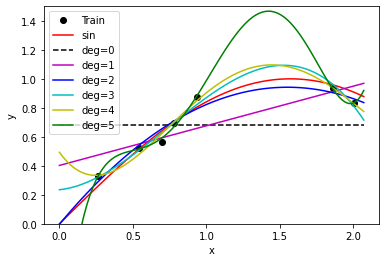

In [23]:
x_gt = np.linspace(x0, x1, 100)
y_gt = np.sin(x_gt)
plt.plot(x, y_train, 'ko', label='Train')
plt.plot(x_gt, y_gt, 'r', label='sin')
cols = ['k--', 'm', 'b', 'c', 'y', 'g', 'k', 'b--']

n=6

for i in range(n):
  plt.plot(x_gt, poly[i](x_gt), cols[i], label='deg={}'.format(i))

plt.legend()
plt.ylim(0, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.draw()

Считаем ошибку на обучении (жирные точки) и тесте (другие точки, но с теми же абсциссами)

In [24]:
eps = np.random.random_sample(N)
y_test = np.sin(x) + 0.1 * eps - 0.05

diff_train = []
diff_test = []

for i in range(N):
    diff_train.append(np.mean(np.abs(y_train - poly[i](x))))
    diff_test.append(np.mean(np.abs(y_test - poly[i](x))))

Выводим результат. Как видим, при больших степенях мы все лучше приближаем train, но все хуже test

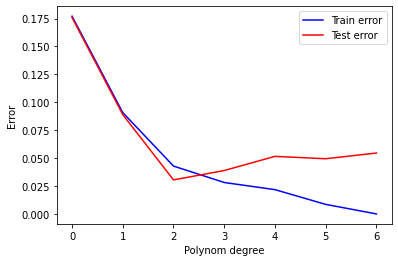

In [25]:
degree = np.linspace(0, N-1, N).astype(np.int32)

plt.plot(degree, diff_train, 'b', label='Train error')
plt.plot(degree, diff_test, 'r', label='Test error')
plt.legend()
plt.xlabel('Polynom degree')
plt.ylabel('Error')
plt.draw()